# SOCAT Feature Importance EOFs

In [7]:
import pandas as pd
import numpy as np
import eofs
import xarray as xr

import cartopy.crs as ccrs
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

from eofs.standard import Eof
from eofs.examples import example_data_path

In [68]:
run_dir = "/data/artemis/workspace/vbennington/SOCAT_ML/dpco2/no_atm_seasonality/enso_mon_sample"

In [69]:
shap_dir = f"{run_dir}/models/reconstructions/xg"

In [57]:
shap = xr.load_dataset(f"{shap_dir}/SHAP_values.nc")

In [70]:
# ENSO First
filename = f"{shap_dir}/SHAP_values.nc"
ncin = Dataset(filename, 'r')
enso = ncin.variables['enso_shap'][:]
# We want only winter months really ....
enso = enso.transpose([0,2,1])
lons = ncin.variables['xlon'][:]
lats = ncin.variables['ylat'][:]
ncin.close()

# Compute anomalies by removing the time-mean.
enso_mean = enso.mean(axis=0)
enso_anom = enso - enso_mean

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(enso_anom, weights=wgts)

# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
eof1 = solver.eofsAsCovariance(neofs=1)



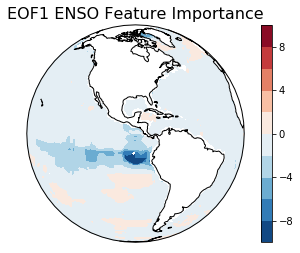

In [74]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-10, 10, 11)
proj = ccrs.Orthographic(central_longitude=-90, central_latitude=10)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
x1=ax.contourf(lons, lats, eof1.squeeze(), levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 ENSO Feature Importance', fontsize=16)
plt.colorbar(x1)

plt.show()

In [76]:
# Chl
filename = f"{shap_dir}/SHAP_values.nc"
ncin = Dataset(filename, 'r')
chl = ncin.variables['chl_log_shap'][:]
chl = chl.transpose([0,2,1])
lons = ncin.variables['xlon'][:]
lats = ncin.variables['ylat'][:]
ncin.close()

# Compute anomalies by removing the time-mean.
chl_mean = chl.mean(axis=0)
chl_anom = chl - chl_mean

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver_chl = Eof(chl_anom, weights=wgts)

# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
chl_eof1 = solver_chl.eofsAsCovariance(neofs=1)

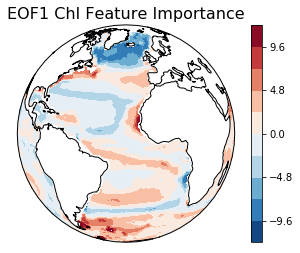

In [81]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-12, 12, 11)
proj = ccrs.Orthographic(central_longitude=-25, central_latitude=10)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
x1=ax.contourf(lons, lats, chl_eof1.squeeze(), levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 Chl Feature Importance', fontsize=16)
plt.colorbar(x1)

plt.show()

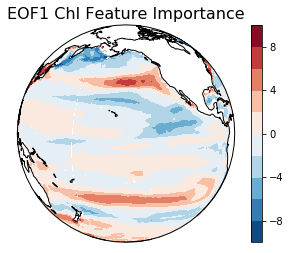

In [83]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-10, 10, 11)
proj = ccrs.Orthographic(central_longitude=-150, central_latitude=10)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
x1=ax.contourf(lons, lats, chl_eof1.squeeze(), levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 Chl Feature Importance', fontsize=16)
plt.colorbar(x1)

plt.show()

In [62]:
# NAO Next
filename = f"{shap_dir}/SHAP_values.nc"
ncin = Dataset(filename, 'r')
nao = ncin.variables['nao_shap'][:]
nao = nao.transpose([0,2,1])
lons = ncin.variables['xlon'][:]
lats = ncin.variables['ylat'][:]
ncin.close()

# Compute anomalies by removing the time-mean.
nao_mean = nao.mean(axis=0)
nao_anom = nao - nao_mean

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver_nao = Eof(nao_anom, weights=wgts)

# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
nao_eof1 = solver_nao.eofsAsCovariance(neofs=1)

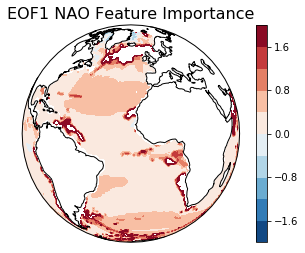

In [86]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-2, 2, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=10)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
x1=ax.contourf(lons, lats, nao_eof1.squeeze(), levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 NAO Feature Importance', fontsize=16)
plt.colorbar(x1)

plt.show()

In [64]:
# xCO2 Next
filename = f"{shap_dir}/SHAP_values.nc"
ncin = Dataset(filename, 'r')
xco2 = ncin.variables['xco2_shap'][:]
xco2 = xco2.transpose([0,2,1])
lons = ncin.variables['xlon'][:]
lats = ncin.variables['ylat'][:]
ncin.close()

# Compute anomalies by removing the time-mean.
xco2_mean = xco2.mean(axis=0)
xco2_anom = xco2 - xco2_mean

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver_xco2 = Eof(xco2_anom, weights=wgts)

# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
xco2_eof1 = solver_xco2.eofsAsCovariance(neofs=1)

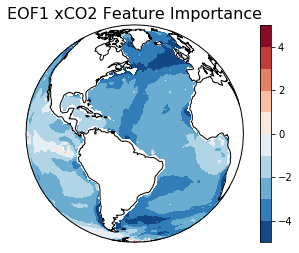

In [65]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-5, 5, 11)
proj = ccrs.Orthographic(central_longitude=-50, central_latitude=10)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
x1=ax.contourf(lons, lats, xco2_eof1.squeeze(), levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 xCO2 Feature Importance', fontsize=16)
plt.colorbar(x1)

plt.show()

In [66]:
# SOI Next
filename = f"{shap_dir}/SHAP_values.nc"
ncin = Dataset(filename, 'r')
soi = ncin.variables['soi_shap'][:]
soi = soi.transpose([0,2,1])
lons = ncin.variables['xlon'][:]
lats = ncin.variables['ylat'][:]
ncin.close()

# Compute anomalies by removing the time-mean.
soi_mean = soi.mean(axis=0)
soi_anom = soi - soi_mean

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver_soi = Eof(soi_anom, weights=wgts)

# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
soi_eof1 = solver_soi.eofsAsCovariance(neofs=1)

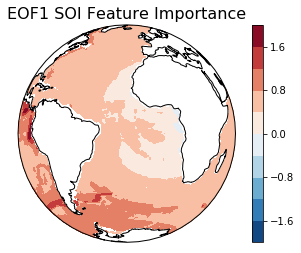

In [67]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-2, 2, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=-10)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
x1=ax.contourf(lons, lats, soi_eof1.squeeze(), levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 SOI Feature Importance', fontsize=16)
plt.colorbar(x1)

plt.show()